In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5)

from __future__ import print_function

In [2]:
data_dir = "data/saved/"
plot_dir = "writeup/plots/"

benchmark_filename = data_dir + "benchmark_results.dat"
df = pd.read_csv(benchmark_filename, delim_whitespace=True, skiprows=1, names=["procs","time", "cells", "steps"])
df["guard"] = 1024 - np.sqrt(df.cells)
df.time = df.time / df.steps


In [3]:
#extract these values by hand from "performance_constants.dat" for your machine
t_start  = 3.73e-5
t_length = 3.56e-9
t_comp   = 6.5983e-9
def performance_model(num_guard_cells, num_true_cells, t_length=t_length, t_comp=t_comp):
    size = np.sqrt(num_true_cells) + num_guard_cells  # the size of either dimension, including guard cells
    T = (4 * t_start) \
        + 4*size*t_length \
        + t_comp*(1 - 6*size + 6*size**2 + 3*num_guard_cells - 6*size*num_guard_cells + 2*num_guard_cells**2 )/(6.)
        
    tau = T / num_true_cells
    return T

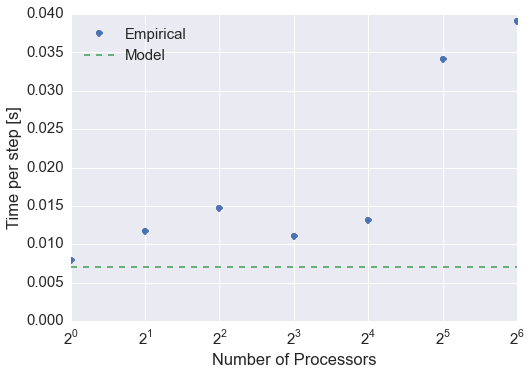

In [4]:
guard_cells = df.iloc[0].guard
true_cells = df.iloc[0].cells

expected_times = performance_model(guard_cells, true_cells)

df[df.guard== 1].set_index("procs").time.plot(label="Empirical", linestyle="", marker="o")
plt.plot([df.procs.min(), df.procs.max()], [expected_times, expected_times], linestyle="dashed")
plt.xlabel("Number of Processors")
plt.ylabel("Time per step [s]")
plt.xscale("log", basex=2)

plt.ylim(ymin=0)
plt.legend(loc="best", labels=["Empirical", "Model"])

plot_filename = "weak_scaling"
plt.savefig(plot_dir + plot_filename + ".eps")
plt.savefig(plot_dir + plot_filename + ".png")

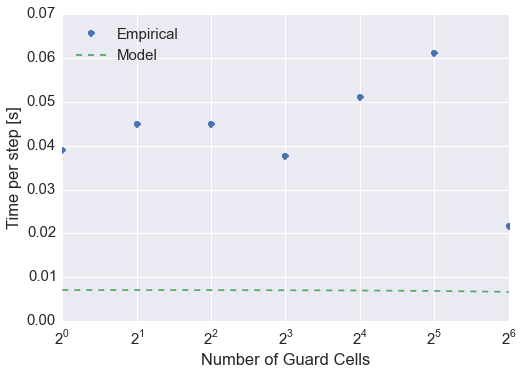

In [5]:
guard_cells = np.array(df[df.procs==64].guard)
true_cells = np.array(df[df.procs==64].cells)
expected_times = performance_model(guard_cells, true_cells)

df[df.procs==64].set_index("guard").time.plot(marker="o", linestyle="")
plt.plot(guard_cells, expected_times, linestyle="dashed")

plt.xlabel("Number of Guard Cells")
plt.ylabel("Time per step [s]")
plt.xscale("log", basex=2)
plt.ylim(ymin=0)
plt.legend(loc="best", labels=["Empirical", "Model"])


plot_filename = "guard_cell_scaling"
plt.savefig(plot_dir + plot_filename + ".eps")
plt.savefig(plot_dir + plot_filename + ".png")